In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sp
import seaborn as sns
import itertools

In [2]:
heart=pd.read_csv("heart (1).csv")

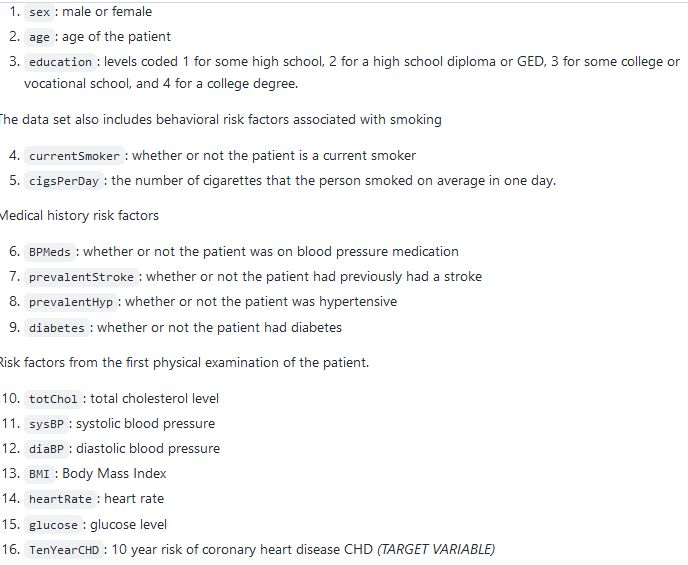

In [3]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
heart.shape

(4240, 16)

In [6]:
heart.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
heart.corr()[["TenYearCHD"]]

,TenYearCHD
male,0.088374
age,0.225408
education,-0.054248
currentSmoker,0.019448
cigsPerDay,0.057755
BPMeds,0.087519
prevalentStroke,0.061823
prevalentHyp,0.177458
diabetes,0.097344
totChol,0.082369


In [9]:
heart.isna().sum() #calculate null

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
#remove null
heart.dropna(inplace=True)

In [11]:
heart.shape

(3658, 16)

In [12]:
heart["TenYearCHD"].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

# datavisualisation

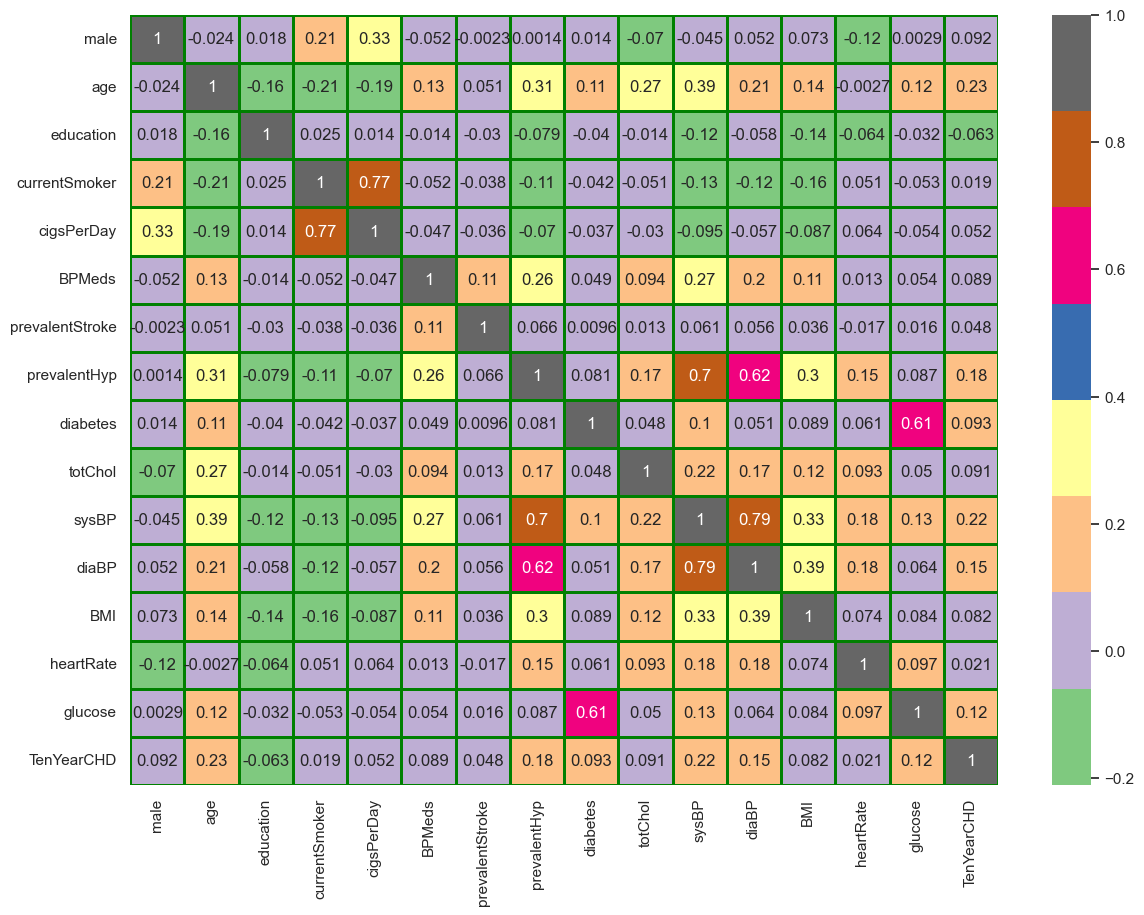

In [13]:
plt.figure(figsize=(14,10))  #figuresize define
sns.set(font_scale=1) #fontsize 
sns.heatmap(heart.corr(),cmap="Accent",annot=True,linecolor="Green",linewidth=1.0)
plt.show()

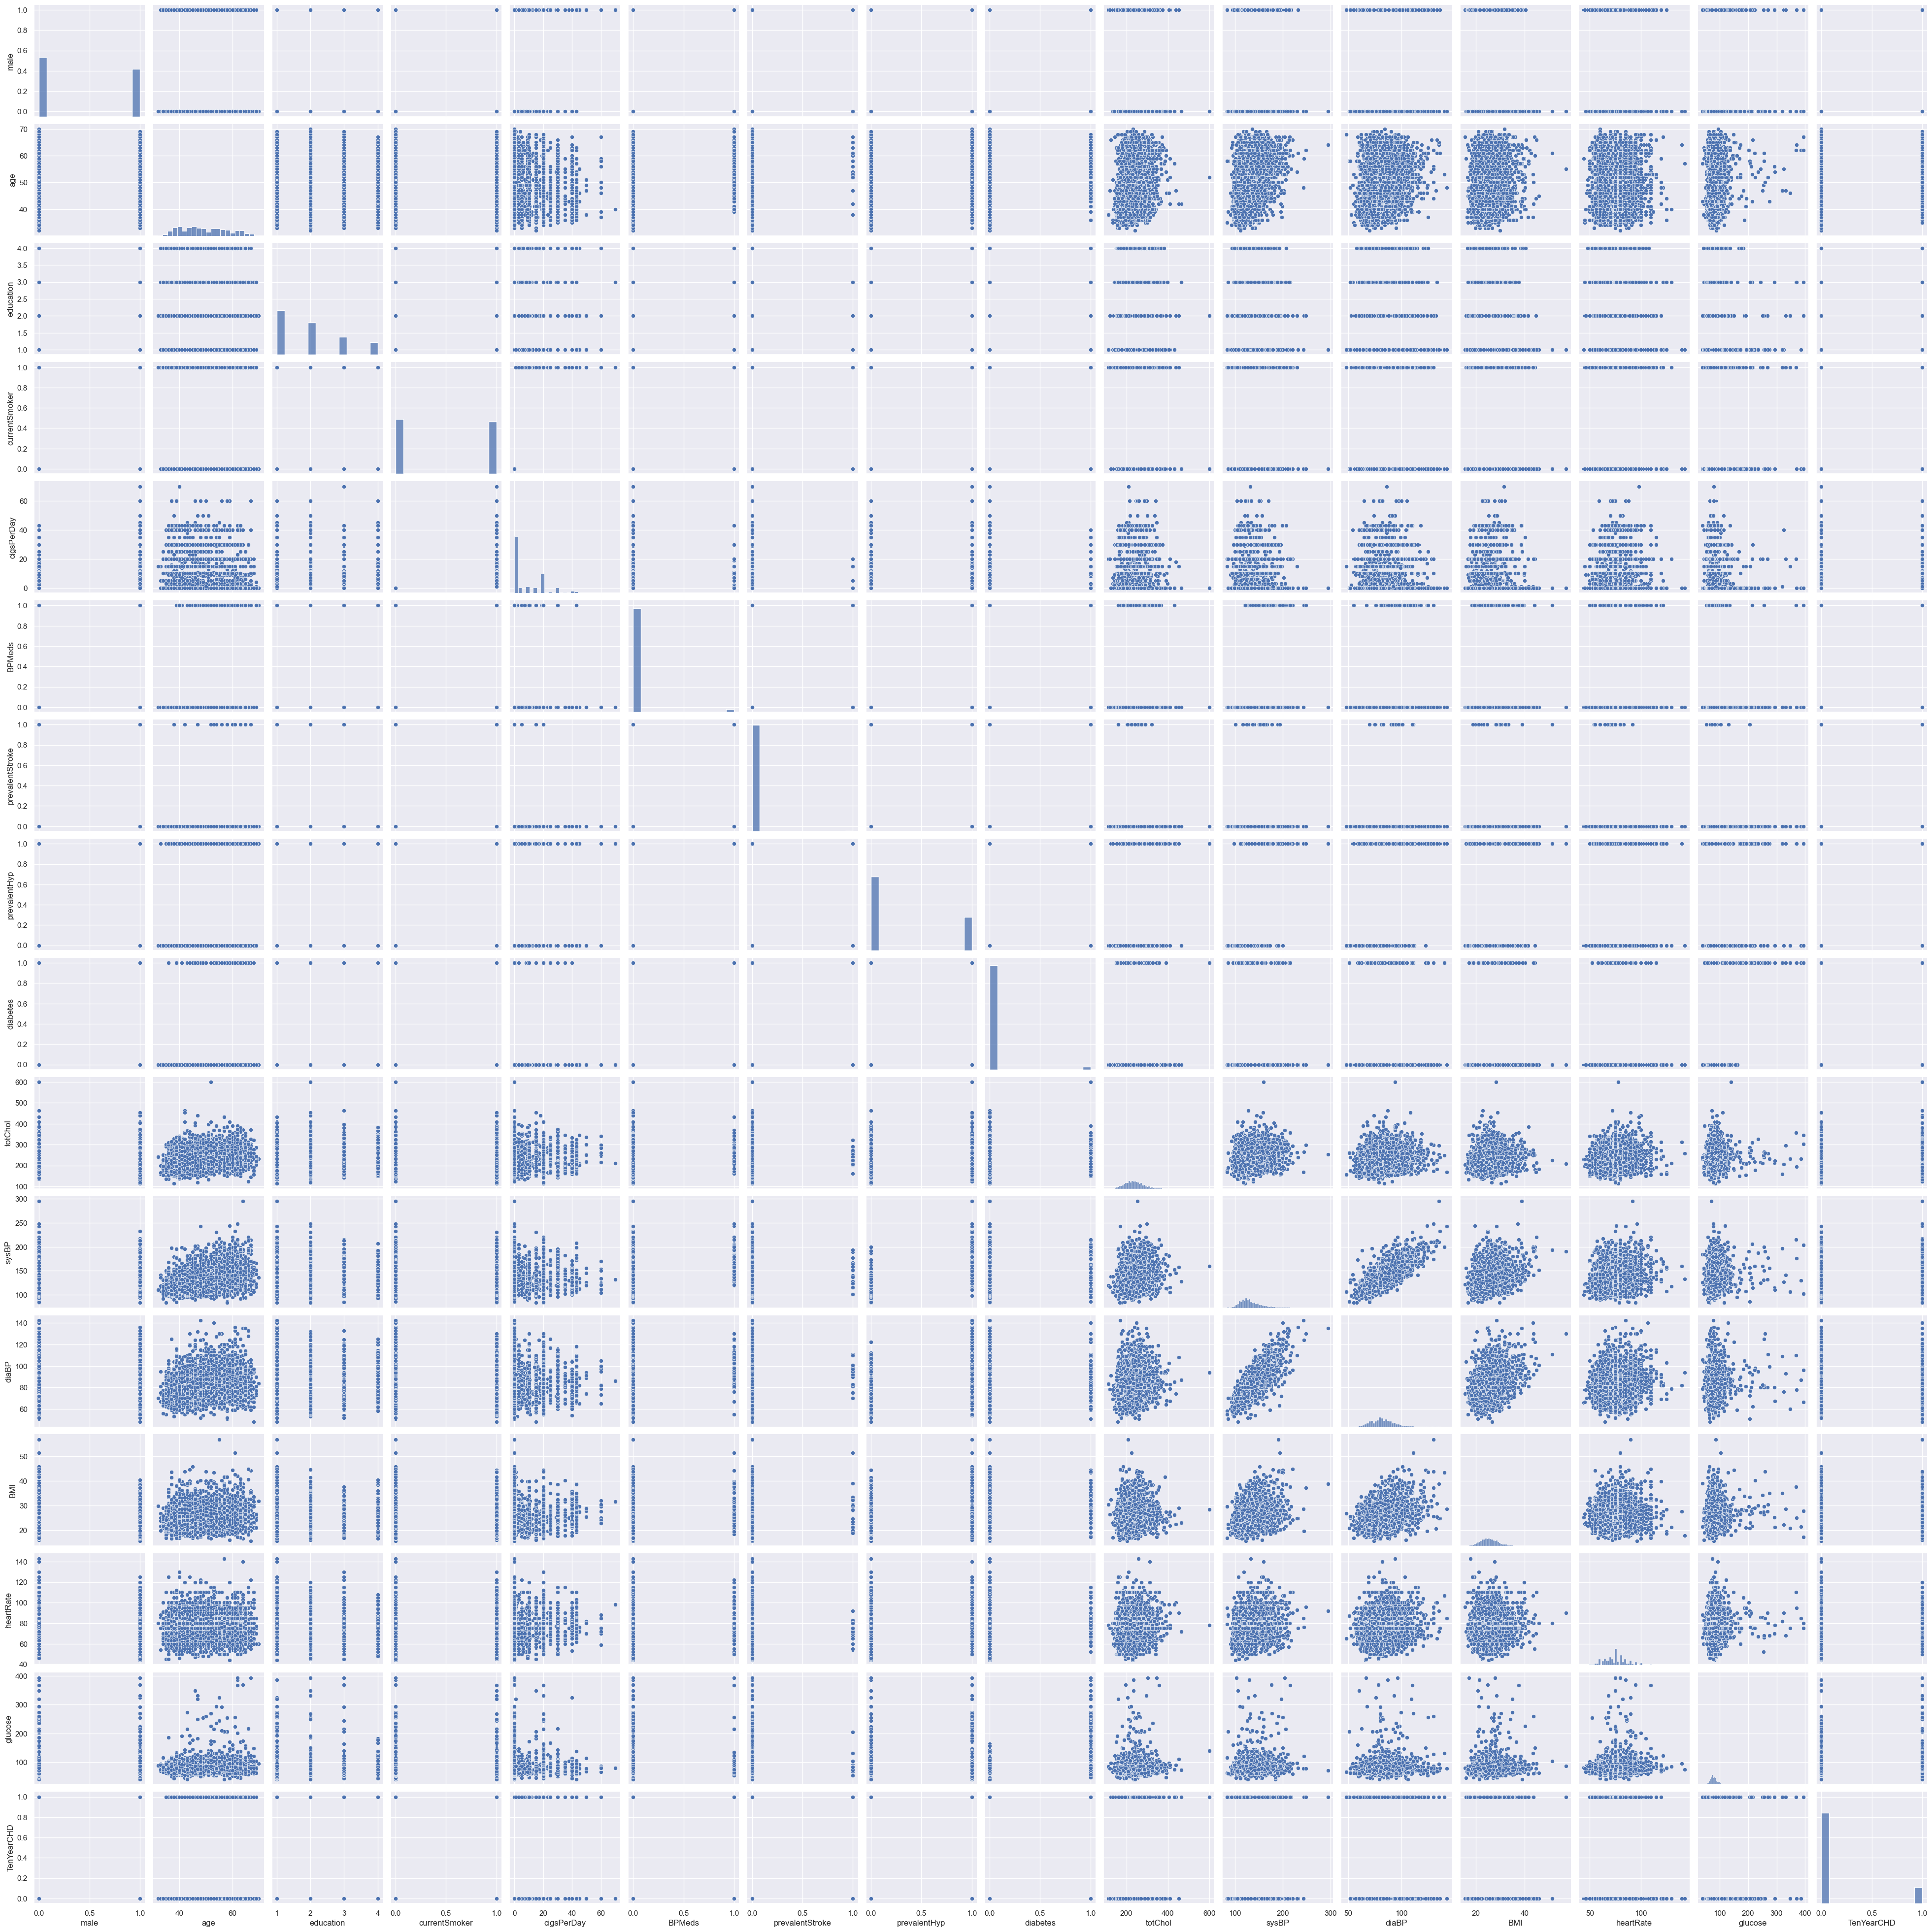

In [14]:
sns.pairplot(heart)
plt.show()

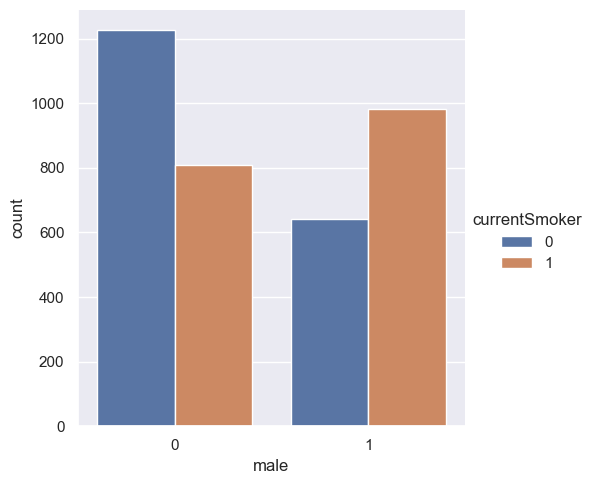

In [15]:
#categoricalplot countplot of people based on gender and smoking habit
sns.catplot(data=heart, kind='count', x="male", hue="currentSmoker")
plt.show()

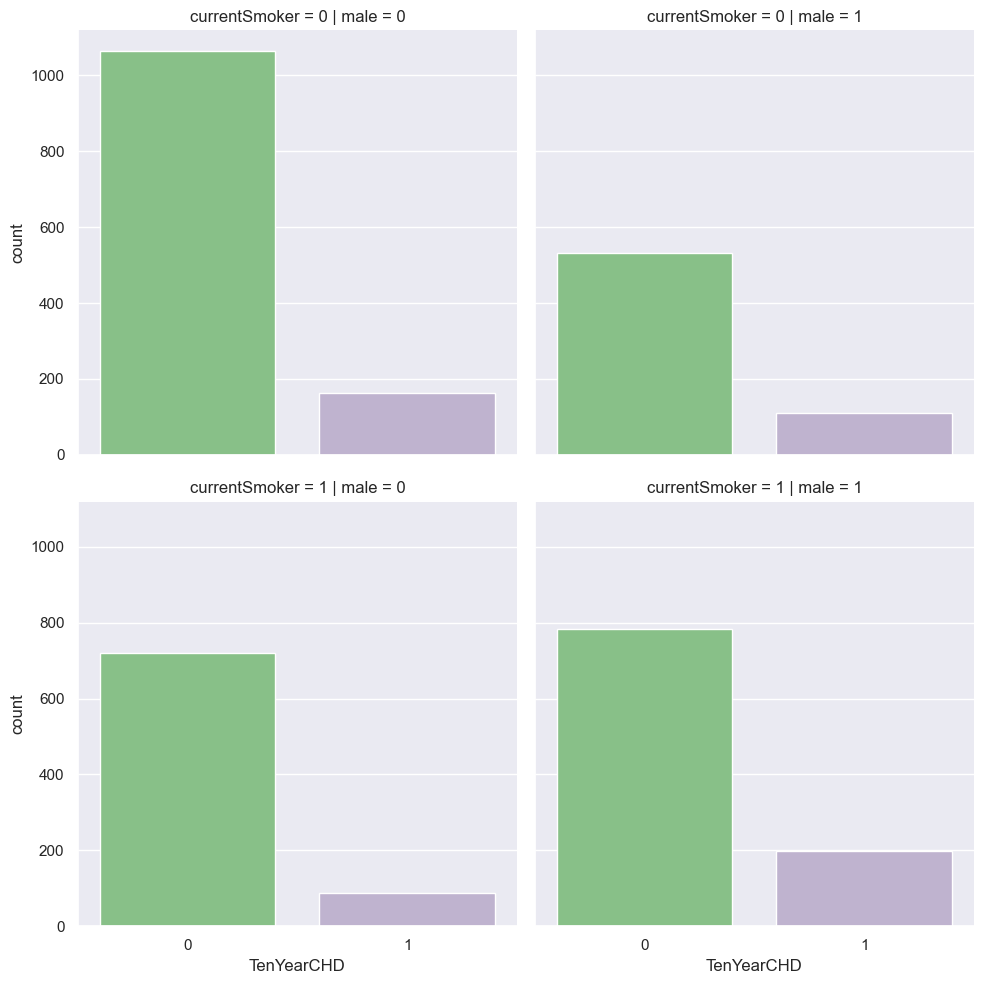

In [16]:
sns.catplot(data=heart,kind="count", x="TenYearCHD",col="male",row="currentSmoker", palette="Accent")
plt.show()

In [17]:
#Importing packages for classification

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [18]:
#seperating data in feature and target 4240, 16
x=heart.iloc[:,0:15].values
y=heart.iloc[:,15:16].values

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
model=LogisticRegression()

In [21]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [22]:
#traing the data

In [23]:
model.fit(x_train,y_train)

C:\Users\Pranali\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pranali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
d_prediction=model.predict(x_test)
print("Logistic Regression Accuracy=",metrics.accuracy_score(d_prediction,y_test))

Logistic Regression Accuracy= 0.8378870673952641


In [25]:
#predicted=d_prediction

In [26]:
#actual=heart["TenYearCHD"]

In [27]:
#actual = np.random.binomial(1,0.9,size = 1000)
#predicted = np.random.binomial(1,.9,size = 1000)

#confusion_matrix = metrics.confusion_matrix(actual, predicted)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

#cm_display.plot()
#plt.show()

In [28]:
#ConfusionMatrix = metrics.confusion_matrix(y_test,d_prediction)
#ConfusionMatrix

#import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix

#color = 'green'
#matrix = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
#matrix.ax_.set_title('Confusion Matrix', color=color)
#plt.xlabel('Predicted', color=color)
#plt.ylabel('Actual Values', color=color)
#plt.gcf().axes[0].tick_params(colors=color)
#plt.gcf().axes[1].tick_params(colors=color)
#plt.show()

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,d_prediction)
print(cm)

[[910   6]
 [172  10]]


In [30]:
cr=classification_report(y_test,d_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       916
           1       0.62      0.05      0.10       182

    accuracy                           0.84      1098
   macro avg       0.73      0.52      0.51      1098
weighted avg       0.81      0.84      0.78      1098



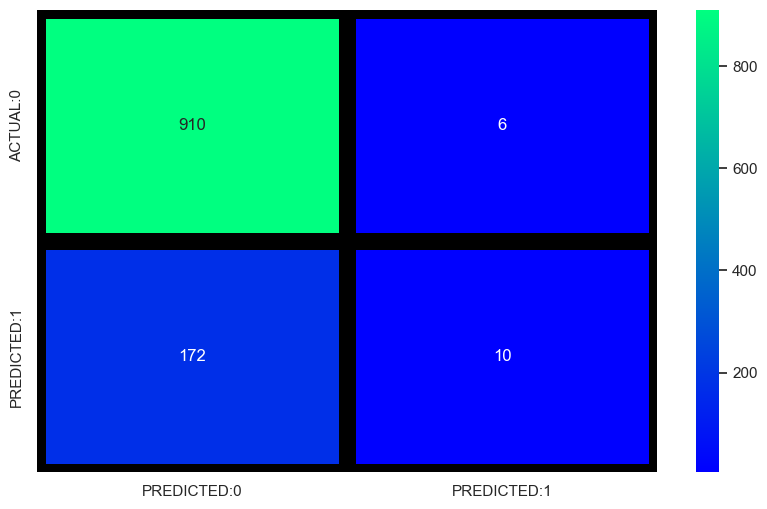

In [31]:
#plotting confusion matrix
matrix=pd.DataFrame(data=cm,columns=["PREDICTED:0","PREDICTED:1"],index=["ACTUAL:0","PREDICTED:1"])
plt.figure(figsize=(10,6))
sns.heatmap(matrix,annot=True,linecolor="black",linewidth=12,cmap="winter",fmt="g")
plt.show()